# Modeling 1D Air Resistance with Linear and Quadratic Models

In [51]:
# Import libraries
import pandas as pd
import math
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [52]:
# Constants
gravitational_acceleration = -9.81  # m/s^2
mass = 0.0036  # kg

In [53]:
# Model Linear and Quadratic Air Resistance
def model(name, times, positions, velocities):
    # Calculate accelerations
    accelerations = [0]
    for i in range(len(times) - 1):
        accelerations.append((velocities[i + 1] - velocities[i]) / (times[i + 1] - times[i]))

    # Define linear and quadratic models
    def linear_eval(velocities, coefficient):
        linear_accelerations = [gravitational_acceleration + coefficient * velocity / mass for velocity in velocities]
        linear_velocities = [0]
        linear_positions = [positions[0]]
        for i in range(len(velocities) - 1):
            linear_velocities.append(linear_velocities[i] + linear_accelerations[i + 1] * (times[i + 1] - times[i]))
            linear_positions.append(linear_positions[i] + linear_velocities[i + 1] * (times[i + 1] - times[i]))
        return linear_accelerations

    def quadratic_eval(velocities, coefficient):
        quadratic_accelerations = [gravitational_acceleration + coefficient * velocity ** 2 / mass for velocity in velocities]
        quadratic_velocities = [0]
        quadratic_positions = [positions[0]]
        for i in range(len(velocities) - 1):
            quadratic_velocities.append(quadratic_velocities[i] + quadratic_accelerations[i + 1] * (times[i + 1] - times[i]))
            quadratic_positions.append(quadratic_positions[i] + quadratic_velocities[i + 1] * (times[i + 1] - times[i]))
        return quadratic_accelerations

    def power_eval(velocities, coefficient, power):
        power_accelerations = [gravitational_acceleration + coefficient * np.sign(velocity) * math.fabs(velocity) ** power / mass for velocity in velocities]
        power_velocities = [0]
        power_positions = [positions[0]]
        for i in range(len(velocities) - 1):
            power_velocities.append(power_velocities[i] + power_accelerations[i + 1] * (times[i + 1] - times[i]))
            power_positions.append(power_positions[i] + power_velocities[i + 1] * (times[i + 1] - times[i]))
        return power_accelerations

    # Curve fit linear and quadratic models
    linear_coefficient, linear_cov = curve_fit(linear_eval, velocities, accelerations)
    quadratic_coefficient, quadratic_cov = curve_fit(quadratic_eval, velocities, accelerations)
    power_coefficient, power_cov = curve_fit(power_eval, velocities, accelerations)

    print(f"Linear Coefficient: {linear_coefficient[0]}, Linear Covariance: {linear_cov[0][0]}")
    print(f"Quadratic Coefficient: {quadratic_coefficient[0]}, Quadratic Covariance: {quadratic_cov[0][0]}")
    print(f"Power Coefficient: {power_coefficient[0]}, Power: {power_coefficient[1]}, Power Covariance: {power_cov}")

    # Model 1D motion with air resistance
    def linear_model(linear_times, coefficient):
        linear_accelerations = [0]
        linear_velocities = [0]
        linear_positions = [positions[0]]
        for i in range(len(linear_times) - 1):
            linear_accelerations.append(gravitational_acceleration + coefficient * linear_velocities[i] / mass)
            linear_velocities.append(linear_velocities[i] + linear_accelerations[i + 1] * (linear_times[i + 1] - linear_times[i]))
            linear_positions.append(linear_positions[i] + linear_velocities[i + 1] * (linear_times[i + 1] - linear_times[i]))
        return linear_accelerations, linear_velocities, linear_positions

    def quadratic_model(quadratic_times, coefficient):
        quadratic_accelerations = [0]
        quadratic_velocities = [0]
        quadratic_positions = [positions[0]]
        for i in range(len(quadratic_times) - 1):
            quadratic_accelerations.append(gravitational_acceleration + coefficient * quadratic_velocities[i] ** 2 / mass)
            quadratic_velocities.append(quadratic_velocities[i] + quadratic_accelerations[i + 1] * (quadratic_times[i + 1] - quadratic_times[i]))
            quadratic_positions.append(quadratic_positions[i] + quadratic_velocities[i + 1] * (quadratic_times[i + 1] - quadratic_times[i]))
        return quadratic_accelerations, quadratic_velocities, quadratic_positions

    def power_model(power_times, coefficient, power):
        power_accelerations = [0]
        power_velocities = [0]
        power_positions = [positions[0]]
        for i in range(len(power_times) - 1):
            power_accelerations.append(gravitational_acceleration + coefficient * np.sign(power_velocities[i]) * math.fabs(power_velocities[i]) ** power / mass)
            power_velocities.append(power_velocities[i] + power_accelerations[i + 1] * (power_times[i + 1] - power_times[i]))
            power_positions.append(power_positions[i] + power_velocities[i + 1] * (power_times[i + 1] - power_times[i]))
        return power_accelerations, power_velocities, power_positions

    model_times = np.linspace(times[0], times[len(times) - 1], 10000)
    linear_accelerations, linear_velocities, linear_positions = linear_model(model_times, linear_coefficient[0])
    quadratic_accelerations, quadratic_velocities, quadratic_positions = quadratic_model(model_times, quadratic_coefficient[0])
    power_accelerations, power_velocities, power_positions = power_model(model_times, power_coefficient[0], power_coefficient[1])

    # Plot data and models
    plt.plot(times, positions)
    plt.plot(model_times, linear_positions)
    plt.plot(model_times, quadratic_positions)
    plt.plot(model_times, power_positions)
    plt.title("Position (m) vs. Time (s)")
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.legend(["Data", "Linear Model", "Quadratic Model", "Power Model"])
    plt.savefig(f"{name}.png", dpi=300)
    plt.show()

/var/folders/3z/rw5w8mxn1tz2n9r7c9q9jzrw0000gp/T/ipykernel_32253/2011373678.py:28: RuntimeWarning: divide by zero encountered in scalar power
  power_accelerations = [gravitational_acceleration + coefficient * np.sign(velocity) * math.fabs(velocity) ** power / mass for velocity in velocities]
/var/folders/3z/rw5w8mxn1tz2n9r7c9q9jzrw0000gp/T/ipykernel_32253/2011373678.py:28: RuntimeWarning: invalid value encountered in scalar multiply
  power_accelerations = [gravitational_acceleration + coefficient * np.sign(velocity) * math.fabs(velocity) ** power / mass for velocity in velocities]


Linear Coefficient: -0.030789148575679836, Linear Covariance: 1.8771597473954186e-05
Quadratic Coefficient: 0.025795779818059954, Quadratic Covariance: 1.7732320819190067e-05
Power Coefficient: -0.03165897856643235, Power: 0.022298240758273052, Power Covariance: [[ 1.04581031e-05 -8.64167598e-05]
 [-8.64167598e-05  2.86441810e-03]]


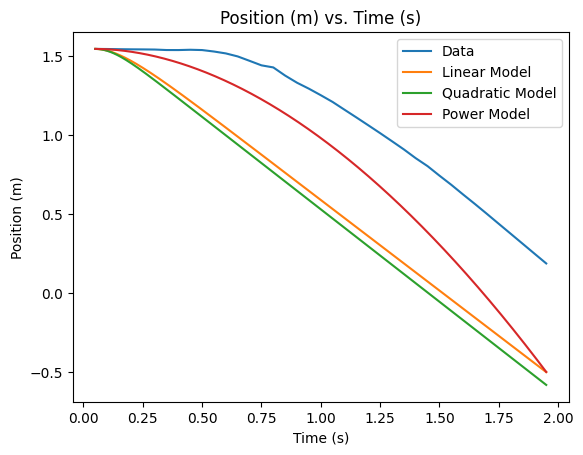

/var/folders/3z/rw5w8mxn1tz2n9r7c9q9jzrw0000gp/T/ipykernel_32253/2011373678.py:28: RuntimeWarning: divide by zero encountered in scalar power
  power_accelerations = [gravitational_acceleration + coefficient * np.sign(velocity) * math.fabs(velocity) ** power / mass for velocity in velocities]
/var/folders/3z/rw5w8mxn1tz2n9r7c9q9jzrw0000gp/T/ipykernel_32253/2011373678.py:28: RuntimeWarning: invalid value encountered in scalar multiply
  power_accelerations = [gravitational_acceleration + coefficient * np.sign(velocity) * math.fabs(velocity) ** power / mass for velocity in velocities]


Linear Coefficient: -0.021810620300361183, Linear Covariance: 8.619171541380647e-05
Quadratic Coefficient: 0.019351727590884604, Quadratic Covariance: 7.483826384853031e-05
Power Coefficient: -0.024303116411661087, Power: 0.21433473917516918, Power Covariance: [[ 8.53559336e-05 -1.19836161e-03]
 [-1.19836161e-03  2.22772530e-01]]


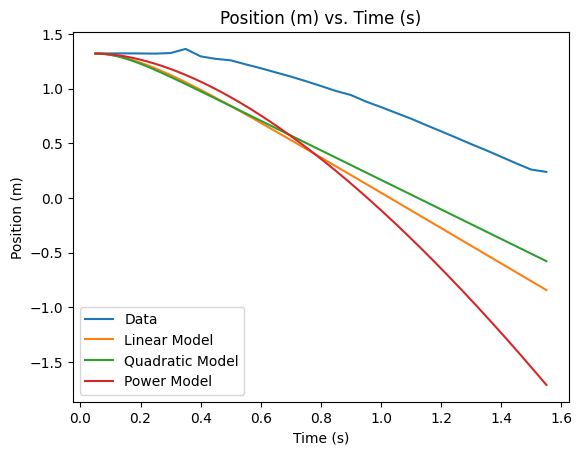

/var/folders/3z/rw5w8mxn1tz2n9r7c9q9jzrw0000gp/T/ipykernel_32253/2011373678.py:28: RuntimeWarning: divide by zero encountered in scalar power
  power_accelerations = [gravitational_acceleration + coefficient * np.sign(velocity) * math.fabs(velocity) ** power / mass for velocity in velocities]
/var/folders/3z/rw5w8mxn1tz2n9r7c9q9jzrw0000gp/T/ipykernel_32253/2011373678.py:28: RuntimeWarning: invalid value encountered in scalar multiply
  power_accelerations = [gravitational_acceleration + coefficient * np.sign(velocity) * math.fabs(velocity) ** power / mass for velocity in velocities]


Linear Coefficient: -0.03419815898507084, Linear Covariance: 2.195054537639595e-05
Quadratic Coefficient: 0.028947633715394473, Quadratic Covariance: 2.4271297317531186e-05
Power Coefficient: -0.03514214254025026, Power: 0.3908979900289887, Power Covariance: [[ 1.94667435e-05 -2.36640963e-04]
 [-2.36640963e-04  5.51947594e-02]]


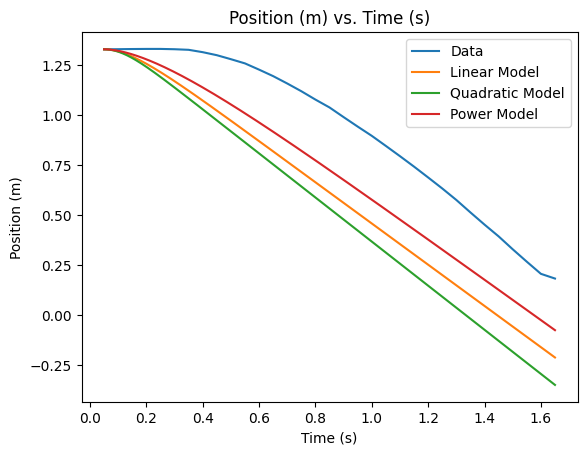

/var/folders/3z/rw5w8mxn1tz2n9r7c9q9jzrw0000gp/T/ipykernel_32253/2011373678.py:28: RuntimeWarning: divide by zero encountered in scalar power
  power_accelerations = [gravitational_acceleration + coefficient * np.sign(velocity) * math.fabs(velocity) ** power / mass for velocity in velocities]
/var/folders/3z/rw5w8mxn1tz2n9r7c9q9jzrw0000gp/T/ipykernel_32253/2011373678.py:28: RuntimeWarning: invalid value encountered in scalar multiply
  power_accelerations = [gravitational_acceleration + coefficient * np.sign(velocity) * math.fabs(velocity) ** power / mass for velocity in velocities]


Linear Coefficient: -0.034653241146701076, Linear Covariance: 3.0035655186920095e-05
Quadratic Coefficient: 0.030781383905598224, Quadratic Covariance: 3.3082601283016845e-05
Power Coefficient: -0.034990893140373194, Power: 2.5535651916691622e-08, Power Covariance: [[ 1.21883918e-05 -1.04045781e-04]
 [-1.04045781e-04  3.59078321e-03]]


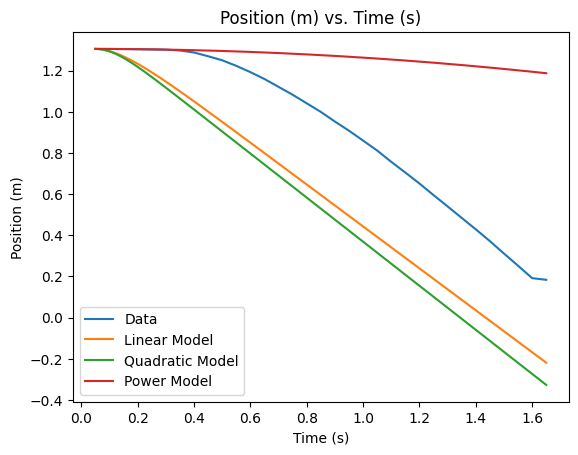

/var/folders/3z/rw5w8mxn1tz2n9r7c9q9jzrw0000gp/T/ipykernel_32253/2011373678.py:28: RuntimeWarning: divide by zero encountered in scalar power
  power_accelerations = [gravitational_acceleration + coefficient * np.sign(velocity) * math.fabs(velocity) ** power / mass for velocity in velocities]
/var/folders/3z/rw5w8mxn1tz2n9r7c9q9jzrw0000gp/T/ipykernel_32253/2011373678.py:28: RuntimeWarning: invalid value encountered in scalar multiply
  power_accelerations = [gravitational_acceleration + coefficient * np.sign(velocity) * math.fabs(velocity) ** power / mass for velocity in velocities]


Linear Coefficient: -0.033522823888698206, Linear Covariance: 2.016296357412609e-05
Quadratic Coefficient: 0.029830265263976807, Quadratic Covariance: 2.2420595380617846e-05
Power Coefficient: -0.03298438845780116, Power: 0.21105746938770026, Power Covariance: [[ 1.77767741e-05 -3.05459896e-04]
 [-3.05459896e-04  3.92962844e-02]]


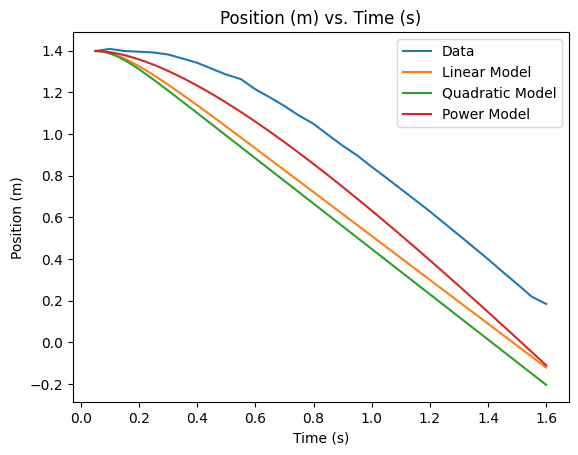

In [54]:
data1 = pd.read_csv("Sensor1.csv")
model("Sensor1", data1["Time (s)"], data1["Position (m)"], data1["Velocity (m/s)"])
data2 = pd.read_csv("Sensor2.csv")
model("Sensor2", data2["Time (s)"], data2["Position (m)"], data2["Velocity (m/s)"])
data3 = pd.read_csv("Sensor3.csv")
model("Sensor3", data3["Time (s)"], data3["Position (m)"], data3["Velocity (m/s)"])
data4 = pd.read_csv("Sensor4.csv")
model("Sensor4", data4["Time (s)"], data4["Position (m)"], data4["Velocity (m/s)"])
data5 = pd.read_csv("Sensor5.csv")
model("Sensor5", data5["Time (s)"], data5["Position (m)"], data5["Velocity (m/s)"])